In [1]:
import pathlib

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, ScalarFormatter
import numpy as np
import seaborn as sns

In [2]:
results_dir = pathlib.Path('results')

plot_data = []
for p in (results_dir / 'flora').iterdir():
    if p.is_dir():
        # parse the directory name
        args = p.name.split('-')
        if len(args) <= 1:
            continue

        # get the args from the dir name
        rand_distribution = None
        rank = None
        clip_norm = None
        for arg in args:
            if arg.startswith('rand_distribution_'):
                rand_distribution = arg[len('rand_distribution_'):]
            elif arg.startswith('rank_'):
                rank = int(arg[len('rank_'):])
            elif arg.startswith('clip_norm_'):
                clip_norm = (arg[len('clip_norm_'):] == 'True')
        if rand_distribution is None or rank is None or clip_norm is None:
            continue

        # load the losses
        train_losses = np.load(p / 'train_losses.npy')
        validation_losses = np.load(p / 'validation_losses.npy')
        df_train = pd.DataFrame({
            'loss_type': 'train',
            'loss': train_losses / train_losses[0],
            'rand_distribution': rand_distribution,
            'rank': rank,
            'clip_norm': clip_norm,
            'epoch': np.arange(len(train_losses))
        })

        df_validation = pd.DataFrame({
            'loss_type': 'validation',
            'loss': validation_losses / validation_losses[0],
            'rand_distribution': rand_distribution,
            'rank': rank,
            'clip_norm': clip_norm,
            'epoch': np.arange(len(validation_losses))
        })

        plot_data.append(df_train)
        plot_data.append(df_validation)

plot_data = pd.concat(plot_data)
plot_data

,loss_type,loss,rand_distribution,rank,clip_norm,epoch
0,train,1.000000,normal,8,False,0
1,train,0.999678,normal,8,False,1
2,train,0.999337,normal,8,False,2
3,train,0.998997,normal,8,False,3
4,train,0.998661,normal,8,False,4
...,...,...,...,...,...,...
9995,validation,0.150461,discrete_3,256,True,9995
9996,validation,0.150445,discrete_3,256,True,9996
9997,validation,0.150429,discrete_3,256,True,9997
9998,validation,0.150414,discrete_3,256,True,9998


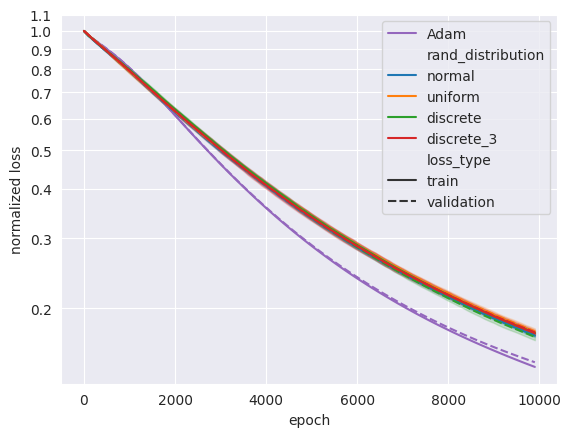

In [3]:
adam_train_losses = np.load(results_dir / 'adam' / 'clip_norm_False-20250612_154706' / 'train_losses.npy')
adam_validation_losses = np.load(results_dir / 'adam' / 'clip_norm_False-20250612_154706' / 'validation_losses.npy')
fig, ax = plt.subplots()
ax.plot(np.arange(0, len(adam_train_losses), 100), adam_train_losses[::100] / adam_train_losses[0], label='Adam', color='tab:purple')
ax.plot(np.arange(0, len(adam_validation_losses), 100), adam_validation_losses[::100] / adam_validation_losses[0], linestyle='dashed', color='tab:purple')
sns.lineplot(
    data=plot_data[(plot_data['rank'] == 8) & (~plot_data['clip_norm'])][::100],
    x='epoch',
    y='loss',
    hue='rand_distribution',
    style='loss_type',
    ax=ax,
)
ax.set(yscale='log')
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_ylabel('normalized loss')
fig.savefig('rand_projections.pdf', bbox_inches='tight')

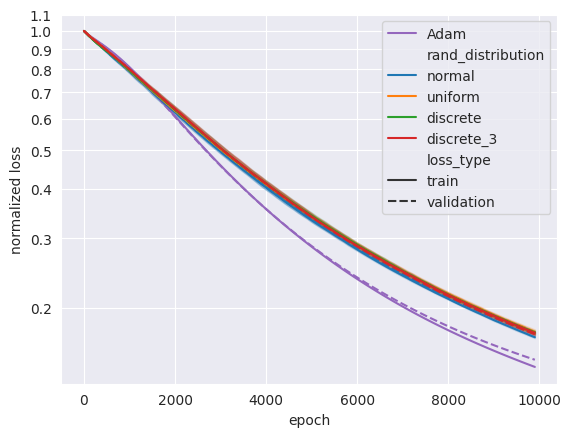

In [4]:
adam_train_losses = np.load(results_dir / 'adam' / 'clip_norm_True-20250612_154749' / 'train_losses.npy')
adam_validation_losses = np.load(results_dir / 'adam' / 'clip_norm_True-20250612_154749' / 'validation_losses.npy')
fig, ax = plt.subplots()
ax.plot(np.arange(0, len(adam_train_losses), 100), adam_train_losses[::100] / adam_train_losses[0], label='Adam', color='tab:purple')
ax.plot(np.arange(0, len(adam_validation_losses), 100), adam_validation_losses[::100] / adam_validation_losses[0], linestyle='dashed', color='tab:purple')
sns.lineplot(
    data=plot_data[(plot_data['rank'] == 8) & (plot_data['clip_norm'])][::100],
    x='epoch',
    y='loss',
    hue='rand_distribution',
    style='loss_type',
    ax=ax,
)
ax.set(yscale='log')
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_ylabel('normalized loss')
fig.savefig('grad_clip.pdf', bbox_inches='tight')